### 1. 목표설정
- 보스턴 집값 데이터를 이용해서 회귀분석을 진행해보자
- 특성곱을 이용해서 새로운 특성을 만들어보자
- 규제 모델을 이용해서 모델의 복잡도를 제어해보자

### 2. 데이터 수집
- csv

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
boston = pd.read_csv('./data/boston_housing.csv')

In [3]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 필요없는 unnamed 컬럼 삭제
boston.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- 결측치 없음

**특성정보 확인**
- CRIM : 범죄율
- INDUS : 비소매상업지역의 연적 비율 -> 도매상업지역의 면적
- NOX : 대기중 일산화질소의 농도
- RM : 주택당 방의 갯수
- LSTAT : 인구 중 하위 계층의 비율
- B : 인구 중 흑인의 비율
- PTRATIO : 학생/교사비율
- ZN : 25,000평방 피트를 초과한 거주지역의 비율
- CHAS : 찰스강의 경계에 위차한 경우 1, 아닌 경우 0
- AGE : 1940년대 이전에 지어진 주택의 비율
- DIS : 직업센터의 거리
- TAX : 재산세율

**종속변수 확인**
- MEDV : 집값

### 3. 데이터 전처리
- 결측치가 없다
- 보스턴 주택 데이터는 학습용으로 제공된 데이터라 전처리가 필요없다.

### 4. 탐색적 데이터 분석
- 생략

### 5. 모델링
- 데이터 분리(X_train, X_test, y_train, y_test)
- 모델 선정 및 학습 / 평가 / 예측

In [7]:
# 1. 데이터 분리하기 위한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [8]:
# 2. 데이터 분리
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=8)

In [9]:
# 3. 데이터 분할 확인
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [10]:
# 상관계수 확인하기
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.182937,0.376299,-0.060861,0.403308,-0.171128,0.340789,-0.362843,0.594251,0.545004,0.267743,-0.348000,0.415125
ZN,-0.182937,1.000000,-0.522421,-0.028334,-0.510633,0.355158,-0.558727,0.636020,-0.301522,-0.313148,-0.382122,0.179154,-0.432618
INDUS,0.376299,-0.522421,1.000000,0.036183,0.769310,-0.399291,0.643300,-0.711740,0.579389,0.725878,0.383825,-0.355823,0.619686
CHAS,-0.060861,-0.028334,0.036183,1.000000,0.089168,0.054014,0.071898,-0.090506,-0.019416,-0.060153,-0.174327,0.046020,-0.054811
NOX,0.403308,-0.510633,0.769310,0.089168,1.000000,-0.330699,0.713332,-0.764739,0.625537,0.683354,0.222476,-0.375495,0.622120
RM,-0.171128,0.355158,-0.399291,0.054014,-0.330699,1.000000,-0.258584,0.221348,-0.179420,-0.273715,-0.346742,0.107636,-0.597224
AGE,0.340789,-0.558727,0.643300,0.071898,0.713332,-0.258584,1.000000,-0.717366,0.456727,0.509456,0.283653,-0.266401,0.609375
DIS,-0.362843,0.636020,-0.711740,-0.090506,-0.764739,0.221348,-0.717366,1.000000,-0.491937,-0.543658,-0.245896,0.293658,-0.503820
RAD,0.594251,-0.301522,0.579389,-0.019416,0.625537,-0.179420,0.456727,-0.491937,1.000000,0.894749,0.451842,-0.459237,0.465304
TAX,0.545004,-0.313148,0.725878,-0.060153,0.683354,-0.273715,0.509456,-0.543658,0.894749,1.000000,0.460166,-0.449736,0.536399


<Axes: >

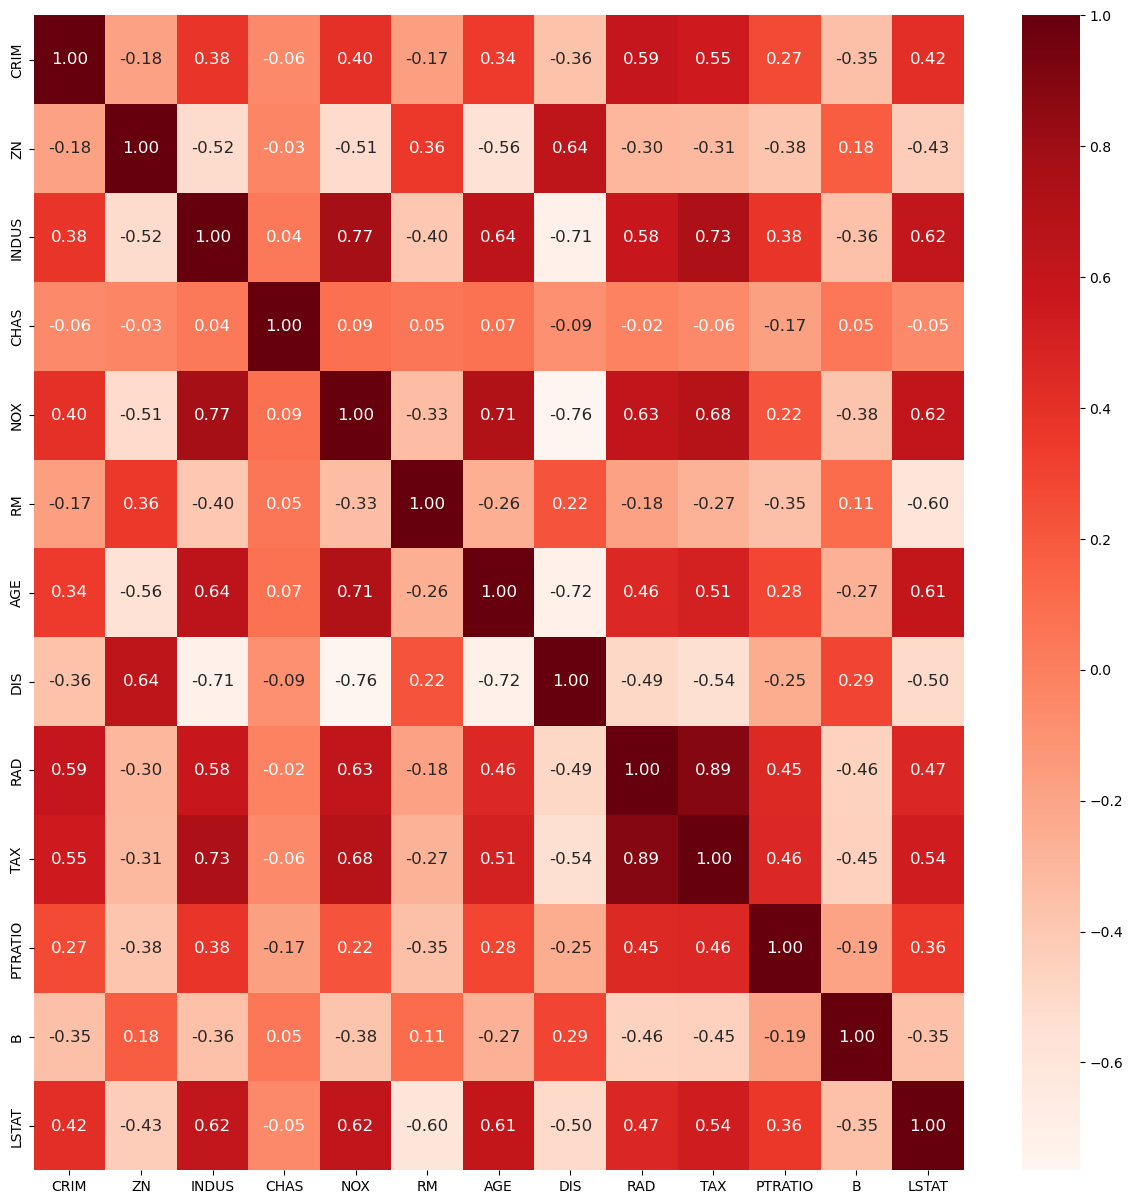

In [11]:
# 상관계수를 히트맵으로 출력
plt.figure(figsize=(15,15))
sns.heatmap(data=X_train.corr(), 
            annot=True, # 히드맵 내부에 글씨 출력
            annot_kws={'size':12}, # 내부 글씨의 옵션(글씨의 크기)
            fmt='.2f',  # 소숫점 자리 출력
            cmap='Reds' #히트맵 색상 출력
           )

In [12]:
# 선형 회귀 모델 사용하기
# 1. 모델 import
from sklearn.linear_model import LinearRegression

In [13]:
# 2. 모델 객체 생성
linear_model = LinearRegression()

In [14]:
# 3. 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 4. 교차검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(linear_model, X_train,y_train,cv = 5)
print(result, result.mean())

[0.71475064 0.72476875 0.73085762 0.70688737 0.58341273] 0.6921354224035872


In [16]:
# 가중치
linear_model.coef_

array([-1.08934120e-01,  5.31327453e-02,  2.34402817e-02,  2.48890273e+00,
       -1.22283083e+01,  3.88090530e+00, -8.65043560e-03, -1.39279889e+00,
        2.72090186e-01, -1.11667903e-02, -9.34401294e-01,  1.05766056e-02,
       -5.59850621e-01])

In [17]:
# 편향
linear_model.intercept_

32.75619254730977

In [18]:
# 정답 예측
pre = linear_model.predict(X_test)
pre

array([19.36667199, 10.90135199, 38.22183643, 27.23008993, 40.86360853,
       27.462814  , 10.70895753, 36.33985245, 29.06780771, 34.65889684,
       13.06383643,  7.48552506, 15.30594202, 24.25609261, 15.7326924 ,
       28.85469028, 23.04674454, 22.4756561 , 21.13184502,  7.04408666,
       21.2118773 , 25.79184486, 30.52378626, 33.20341621, 28.66897069,
       35.44676805,  5.18094668, 14.36500631, 25.3635775 , 23.47314327,
       34.76079769, 18.53634825, 19.3854543 , 22.62515352, 25.72569699,
       27.00326966, 32.77697248, 25.60236289, 14.17206244, 14.13144421,
       21.53407601, 22.06013745, 36.0022969 , 35.29690286, 23.51437086,
       19.59457401, 19.9447559 , 21.21333233, 25.9417255 , 24.31696286,
       20.3417074 , 16.57330724, 32.43896087, 16.28495814, 22.30364436,
       24.79835447, 20.81794378,  5.29117863, 20.08017474, 28.56185743,
       24.7867144 , 21.73890171, 20.53304151,  8.69947126, 13.85691136,
       17.77498272, 12.76563098, 20.30967384, 35.36378927, 35.64

- 회귀 평가 지표를 이용해서 모델을 평가해보자
- MSE, MAE, RMSE, R2스코어

In [19]:
# 평가지표 import
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [20]:
# MSE 사용하기
mean_squared_error(pre, y_test)

23.716180926283442

In [21]:
# RMSE 사용하기
# sklearn 내부에서는 RMSE를 지원하지 않는다 -> numpy에 있는 sqr함수 사용
np.sqrt(mean_squared_error(pre, y_test))

4.869926172570119

In [22]:
# MAE 사용하기
mean_absolute_error(pre, y_test)

3.4532926552623264

In [23]:
# r2Score 사용하기
r2_score(pre, y_test)

0.6570277457568254

In [24]:
# score 함수 사용하기
linear_model.score(X_train, y_train)

0.749818773119032

- 현재 회귀모델은 성능이 그렇게 좋은편으 아닌것 같다
- 일반적으로 선형회귀모델은 데이터의 특성이 많을 수록 성능이 좋아진다
- 특성이 적은 경우 선형회귀 모델이 간단(단순)해진다 -> 성능이 낮아질수 밖에 없다
- 모델을 제어할 수 있는 하이퍼 파라미터 조정이 불가능하기 떄문이다.
- 특성 곱을 이용해서 새로운 특성을 만들어보자

### 원본 데이터 프레임 복사하기

In [25]:
# copy() : 데이터 프레임의 현재 상태를 복사/복사 당시의 데이터 프레임 상태만 복사하는 깊은 복사
X_train_copy = X_train.copy()

In [26]:
X_train_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
294,0.08199,0.0,13.92,0.0,0.437,6.009,42.3,5.5027,4.0,289.0,16.0,396.90,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03
361,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,224.0,20.2,396.90,9.29


In [27]:
# 기존의 훈련용 문제 데이터에 훈련용 정답 컬럼을 추가
# 정답을 포함한 상관관계를 파악하기 위해서 정답 컬럼을 추가
X_train_copy['MEDV'] = y_train

In [28]:
# 데이터 프레임 형태 변경
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
 13  MEDV     354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [31]:
X_train_copy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182937,0.376299,-0.060861,0.403308,-0.171128,0.340789,-0.362843,0.594251,0.545004,0.267743,-0.348000,0.415125,-0.367320
ZN,-0.182937,1.000000,-0.522421,-0.028334,-0.510633,0.355158,-0.558727,0.636020,-0.301522,-0.313148,-0.382122,0.179154,-0.432618,0.409318
INDUS,0.376299,-0.522421,1.000000,0.036183,0.769310,-0.399291,0.643300,-0.711740,0.579389,0.725878,0.383825,-0.355823,0.619686,-0.500334
CHAS,-0.060861,-0.028334,0.036183,1.000000,0.089168,0.054014,0.071898,-0.090506,-0.019416,-0.060153,-0.174327,0.046020,-0.054811,0.173157
NOX,0.403308,-0.510633,0.769310,0.089168,1.000000,-0.330699,0.713332,-0.764739,0.625537,0.683354,0.222476,-0.375495,0.622120,-0.450981
RM,-0.171128,0.355158,-0.399291,0.054014,-0.330699,1.000000,-0.258584,0.221348,-0.179420,-0.273715,-0.346742,0.107636,-0.597224,0.682933
AGE,0.340789,-0.558727,0.643300,0.071898,0.713332,-0.258584,1.000000,-0.717366,0.456727,0.509456,0.283653,-0.266401,0.609375,-0.416446
DIS,-0.362843,0.636020,-0.711740,-0.090506,-0.764739,0.221348,-0.717366,1.000000,-0.491937,-0.543658,-0.245896,0.293658,-0.503820,0.277109
RAD,0.594251,-0.301522,0.579389,-0.019416,0.625537,-0.179420,0.456727,-0.491937,1.000000,0.894749,0.451842,-0.459237,0.465304,-0.371693
TAX,0.545004,-0.313148,0.725878,-0.060153,0.683354,-0.273715,0.509456,-0.543658,0.894749,1.000000,0.460166,-0.449736,0.536399,-0.468239


- 현재 MEDV 컬럼의 상관관계가 뒤죽박죽 섞여있다. 정리를 해서 확인해보자

In [32]:
# 내부 상관 계수 값을 절대값으로 변경
X_train_abs = X_train_copy.corr().abs()

# 절대값으로 변경된 상관 계수를 내림차순으로 정렬하기 
# 기준은 MEDV
X_train_abs.sort_values('MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CHAS,0.060861,0.028334,0.036183,1.000000,0.089168,0.054014,0.071898,0.090506,0.019416,0.060153,0.174327,0.046020,0.054811,0.173157
DIS,0.362843,0.636020,0.711740,0.090506,0.764739,0.221348,0.717366,1.000000,0.491937,0.543658,0.245896,0.293658,0.503820,0.277109
B,0.348000,0.179154,0.355823,0.046020,0.375495,0.107636,0.266401,0.293658,0.459237,0.449736,0.186885,1.000000,0.353329,0.334972
CRIM,1.000000,0.182937,0.376299,0.060861,0.403308,0.171128,0.340789,0.362843,0.594251,0.545004,0.267743,0.348000,0.415125,0.367320
RAD,0.594251,0.301522,0.579389,0.019416,0.625537,0.179420,0.456727,0.491937,1.000000,0.894749,0.451842,0.459237,0.465304,0.371693
ZN,0.182937,1.000000,0.522421,0.028334,0.510633,0.355158,0.558727,0.636020,0.301522,0.313148,0.382122,0.179154,0.432618,0.409318
AGE,0.340789,0.558727,0.643300,0.071898,0.713332,0.258584,1.000000,0.717366,0.456727,0.509456,0.283653,0.266401,0.609375,0.416446
NOX,0.403308,0.510633,0.769310,0.089168,1.000000,0.330699,0.713332,0.764739,0.625537,0.683354,0.222476,0.375495,0.622120,0.450981
TAX,0.545004,0.313148,0.725878,0.060153,0.683354,0.273715,0.509456,0.543658,0.894749,1.000000,0.460166,0.449736,0.536399,0.468239
INDUS,0.376299,0.522421,1.000000,0.036183,0.769310,0.399291,0.643300,0.711740,0.579389,0.725878,0.383825,0.355823,0.619686,0.500334


- MEDV와 상관계수가 높은 컬럼 2개 찾기
- LSTAT과 RM이라는 컬럼이 상관 계수가 높았다 -> 두가지 컬럼을 가지고 특성 곱이라는 확장을 진행

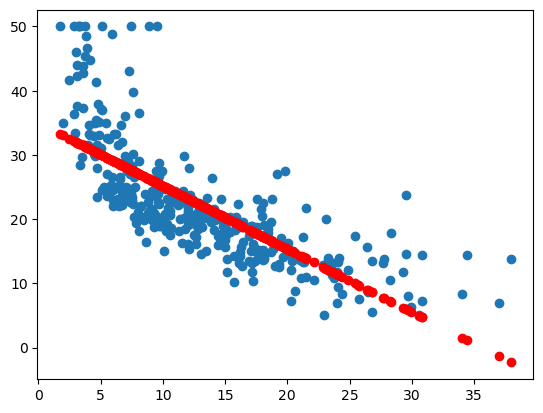

In [33]:
# 상관계수가 높은 데이터를 가지고 특성 확장 해보기
# 확장전 : 먼저 LSTAT 특성만 가지고 학습 시킨후 예측을 어떻게 하는지 시각화

# 모델 학습 -> LSTAT만 가지고 학습
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT']])

# 차트 그려보기 -> 스케터 차트 두개 그려보기(실제 데이터, 예측 데이터)
plt.scatter(X_train['LSTAT'], y_train) # 실제 데이터
plt.scatter(X_train['LSTAT'], pre, color='red') # 예측 데이터
plt.show()

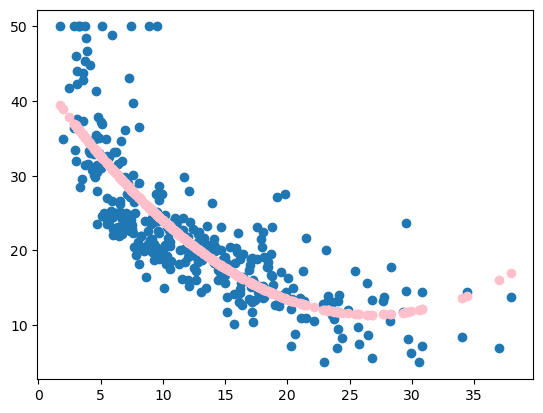

In [35]:
# 특성 확장 후 본래 LSTAT 특성과 확장 LSTAT 특성을 가지고 학습시킨후 예측을 어떻게 하는지 보자
# 특성 추가 확장
X_train['LSTAT*LSTAT'] = X_train['LSTAT']*X_train['LSTAT']

# 모델 학습
model2 = LinearRegression()
model2.fit(X_train[['LSTAT','LSTAT*LSTAT']], y_train)
pre = model2.predict(X_train[['LSTAT','LSTAT*LSTAT']])

plt.scatter(X_train['LSTAT'], y_train) # 실제 데이터
plt.scatter(X_train['LSTAT'], pre, color='pink') # 예측 데이터
plt.show()

- 직선의 형태가 아니네? -> 곡선이면 비선형인가??
- 다항 회귀의 이해가 필요함
- 다항 회귀 : 독립변수의 단항식이 아닌 (독립변수 X가 1개 아닌) 2차, 3차 방정식과 같은 다항식으로 표현된 것이 다항 회귀라고 한다.
   
<font color='red'>
    주의) <br>
    1. 다항회귀를 선형이 아닌 비선형으로 혼동할 수 있다. -> 선형 회귀라는 것을 기억하자<br>
    2. 선형/비선형 회귀를 나누는 기준? -> 가중치(회귀계수 w)가 선형/비선형인지를 확인해보자<br>
    3. 독립변수(문자 데이터,특성, X)가 선형/비선형인지를 따르지 않는다.
</font>

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         354 non-null    float64
 1   ZN           354 non-null    float64
 2   INDUS        354 non-null    float64
 3   CHAS         354 non-null    float64
 4   NOX          354 non-null    float64
 5   RM           354 non-null    float64
 6   AGE          354 non-null    float64
 7   DIS          354 non-null    float64
 8   RAD          354 non-null    float64
 9   TAX          354 non-null    float64
 10  PTRATIO      354 non-null    float64
 11  B            354 non-null    float64
 12  LSTAT        354 non-null    float64
 13  LSTAT*LSTAT  354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [38]:
# X_test 에도 확장 LSTAT를 추가시켜줘보자
X_test['LSTAT*LSTAT'] = X_test['LSTAT']* X_test['LSTAT']

In [39]:
# 모델 객체 생성
model = LinearRegression()

In [40]:
# 모델 학습
model.fit(X_train, y_train) # X_train에는 확장된 LSTAT 컬럼 추가

LinearRegression()

In [42]:
# 모델 평가
model.score(X_test, y_test)

0.7587390463589593

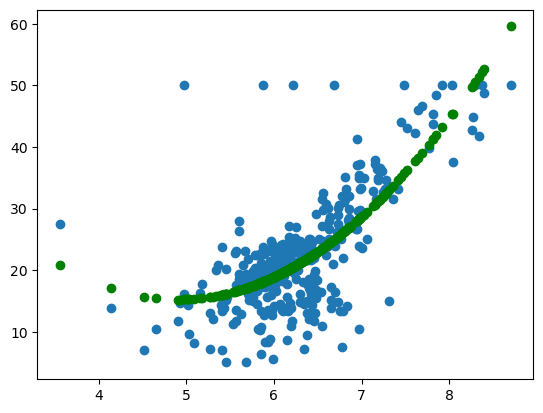

In [45]:
# 특성 확장 하나 더 추가해보자
# 상관 관계가 높았던 RM이라는 컬럼도 특성확장을 추가 
# 특성 확장 후 본래 RM 특성과 확장 RM 특성을 가지고 학습시킨후 예측을 어떻게 하는지 보자
# 특성 추가 확장
X_train['RM*RM'] = X_train['RM']*X_train['RM']

# 모델 학습
model2 = LinearRegression()
model2.fit(X_train[['RM','RM*RM']], y_train)
pre = model2.predict(X_train[['RM','RM*RM']])

plt.scatter(X_train['RM'], y_train) # 실제 데이터
plt.scatter(X_train['RM'], pre, color='green') # 예측 데이터
plt.show()

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         354 non-null    float64
 1   ZN           354 non-null    float64
 2   INDUS        354 non-null    float64
 3   CHAS         354 non-null    float64
 4   NOX          354 non-null    float64
 5   RM           354 non-null    float64
 6   AGE          354 non-null    float64
 7   DIS          354 non-null    float64
 8   RAD          354 non-null    float64
 9   TAX          354 non-null    float64
 10  PTRATIO      354 non-null    float64
 11  B            354 non-null    float64
 12  LSTAT        354 non-null    float64
 13  LSTAT*LSTAT  354 non-null    float64
 14  RM*RM        354 non-null    float64
dtypes: float64(15)
memory usage: 44.2 KB


In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         152 non-null    float64
 1   ZN           152 non-null    float64
 2   INDUS        152 non-null    float64
 3   CHAS         152 non-null    float64
 4   NOX          152 non-null    float64
 5   RM           152 non-null    float64
 6   AGE          152 non-null    float64
 7   DIS          152 non-null    float64
 8   RAD          152 non-null    float64
 9   TAX          152 non-null    float64
 10  PTRATIO      152 non-null    float64
 11  B            152 non-null    float64
 12  LSTAT        152 non-null    float64
 13  LSTAT*LSTAT  152 non-null    float64
dtypes: float64(14)
memory usage: 17.8 KB


In [48]:
X_test['RM*RM'] = X_test['RM']* X_test['RM']

In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         152 non-null    float64
 1   ZN           152 non-null    float64
 2   INDUS        152 non-null    float64
 3   CHAS         152 non-null    float64
 4   NOX          152 non-null    float64
 5   RM           152 non-null    float64
 6   AGE          152 non-null    float64
 7   DIS          152 non-null    float64
 8   RAD          152 non-null    float64
 9   TAX          152 non-null    float64
 10  PTRATIO      152 non-null    float64
 11  B            152 non-null    float64
 12  LSTAT        152 non-null    float64
 13  LSTAT*LSTAT  152 non-null    float64
 14  RM*RM        152 non-null    float64
dtypes: float64(15)
memory usage: 19.0 KB


In [50]:
# 모델 객체 생성
model= LinearRegression()

In [51]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# 모델 평가
model.score(X_test, y_test)

0.7770548249367983

- 정리
    - 특성확장을 진행해서 선형회귀 모델의 성능이 개선된 것을 확인했다.
    - 기존에는 LSTAT과 RM이라는 컬럼만 특성 확장을 진행
    - (가설)전체 컬럼을 가지고 특성 확장을 진행하면 성능이 좋아지지 않을까?

In [53]:
# 전체 컬럼을 가지고 특성 확장 진행해보기
# 1. 기존에 특성이 확장된 컬럼을 삭제
X_train.drop(['LSTAT*LSTAT','RM*RM'], axis=1 , inplace=True)
X_test.drop(['LSTAT*LSTAT','RM*RM'], axis=1 , inplace=True)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(13)
memory usage: 38.7 KB


In [55]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    float64
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(13)
memory usage: 16.6 KB


In [56]:
# X_train의 컬럼은 13개 -> 모든 컬럼을 확장
X_train_copy2 = X_train.copy()

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
# 반복문 작성
for col1 in X_train.columns:
    for col2 in X_train.columns:
        X_train_copy2[col1 + '*' + col2] = X_train[col1]*X_train[col2]

In [59]:
X_train_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Columns: 182 entries, CRIM to LSTAT*LSTAT
dtypes: float64(182)
memory usage: 506.1 KB


In [61]:
# X_test의 컬럼은 13개 -> 모든 컬럼을 확장
X_test_copy2 = X_test.copy()

# 반복문 작성
for col1 in X_test.columns:
    for col2 in X_test.columns:
        X_test_copy2[col1 + '*' + col2] = X_test[col1]*X_test[col2]

In [62]:
X_test_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Columns: 182 entries, CRIM to LSTAT*LSTAT
dtypes: float64(182)
memory usage: 217.3 KB


In [63]:
model = LinearRegression()

model.fit(X_train_copy2, y_train)

LinearRegression()

In [64]:
model.score(X_test_copy2,y_test)

0.8411023100526166

In [65]:
model.score(X_train_copy2, y_train)

0.937570467642756

- 특성 확장을 진행 해봤더니 성능 자체는 올라간 것처럼 보인다
- 하지만 모델 자체가 복잡해져서 과대 적합의 모습을 보이고 있다.
- 일반화에는 크게 도움이 된 것 같지 않다

### 규제
- 선형회귀에서 모델의 일반화를 위해 과적합 상태를 어떻게 제어할 것 인가?
- 선형 회귀 모델에서 과대적합의 위험을 감소시키기 위해 w값의 비중을 줄이는 것

### 모델정규화
- w(회귀 계수) 값이 크다 = 입력에 따른 예측 결과가 크게 바뀜 -> 새로운 데이터가 들어오면 제대로 예측하지 못할 수 있음 = 과대적합의 위험이 높음
- w값을 적절히 낮게 조절하여 과대 적합의 위험을 줄이는 것이 핵심

- L1규제 : Lasso
    - w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정 계수들은 0이 됨. 특성 선택이 자동으로 이루어짐
        
- L2규제 : Ridge
    - w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만든다
    - -> 모든 원소에 같은 비율로 규제를 가하는 방법

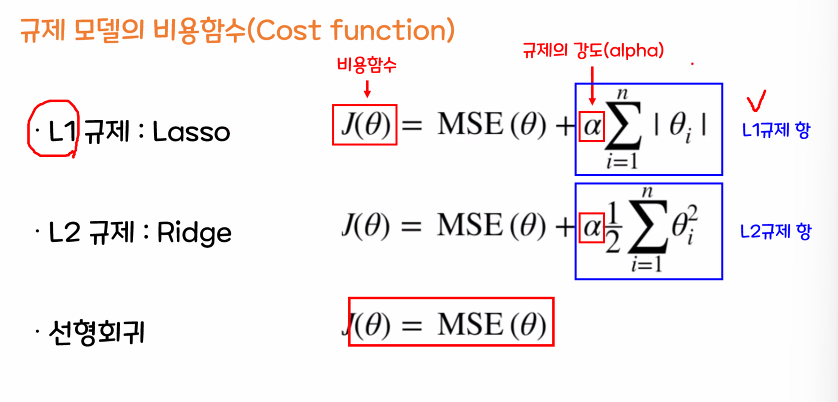

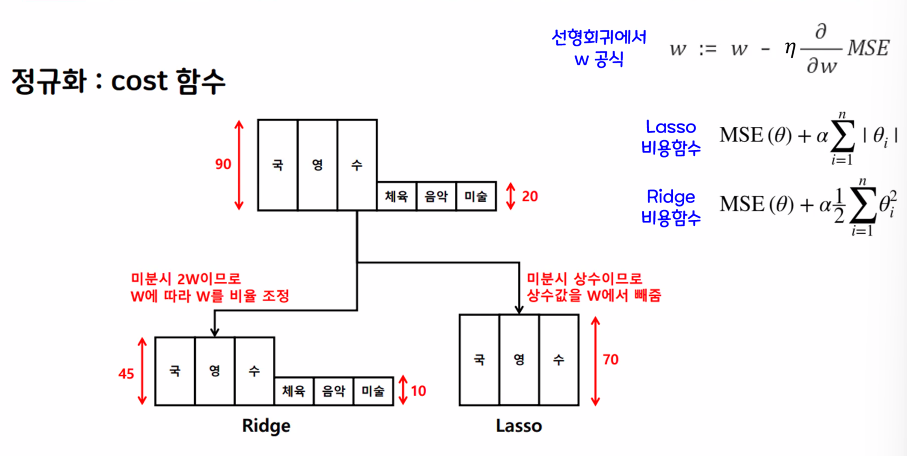

- L1(Lasso)
    - 중요하지 않은 변수는 제외
    - 특성 간 상관관계가 상대적으로 낮은 경우 사용

- L2(Ridge)
    - 모든 변수에 같은 비율로 규제를 적용
    - 특성 간 상관관계가 상대적으로 높은 경우 사용
    
- L1+L2(ElasticNet)
    - L1규제로 변수를 줄이고 L2규제로 남은 변수들의 영향도를 줄임
    - 특성 수가 데이터 수보다 많을때 사용

- L1 Lasso 규제 : 가중치에 똑같은 힘으로 규제를 적용하는 방법,자동으로 선택이 일어남

- L2 Ridge 규제 : 모든 가중치에 같은 비율로 규제를 적용하는 방법, 0이되는 가중치가 없음 -> 비율이라는 방법으로 규제를 적용하기 떄문에

### Ridge 모델

In [67]:
from sklearn.linear_model import Ridge

In [76]:
# alpha : 규제의 강도를 정해주는 파라미터
ridge_model = Ridge(alpha = 10000)

In [77]:
ridge_model.fit(X_train_copy2, y_train)

Ridge(alpha=10000)

In [78]:
ridge_model.score(X_test_copy2, y_test)

0.8151422383894542

In [79]:
ridge_model.score(X_train_copy2, y_train)

0.8925778537202802

### Lasso 모델

In [80]:
from sklearn.linear_model import Lasso

In [81]:
lasso_model = Lasso(alpha=100)

In [82]:
lasso_model.fit(X_train_copy2, y_train)

Lasso(alpha=100)

In [83]:
lasso_model.score(X_test_copy2, y_test)

0.7326907065463396

In [84]:
lasso_model.score(X_train_copy2, y_train)

0.7869134413300253

In [85]:
# 반복문을 이용해서 Ridge와 Lasso alpha 값을 조절해보고 모델을 비교해보자
# 1. 알파값 리스트 만들기
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]

# 2. ridge 모델과 lasso 모델 성능을 기록할 리스트 만들어주기
ridge_coef_list = []
lasso_coef_list = []

# 3.반복문 만들기 
# 모델 제작
for i in alpha_list:
    r_model = Ridge(alpha = i)
    l_model = Lasso(alpha = i)
    
    # 모델 학습
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    
    # 가중치 확인 후 리스트에 넣기
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

In [86]:
# Lasso 가중치 값 확인
lasso_df = pd.DataFrame(
    np.array(lasso_coef_list).T,
    columns=alpha_list, 
    index=X_train.columns
)

lasso_df

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.108736,-0.106955,-0.101500,-0.000000,-0.000000,-0.0
ZN,0.053167,0.053478,0.055203,0.043928,0.000000,0.0
INDUS,0.022027,0.009300,-0.008307,-0.000000,-0.000000,-0.0
CHAS,2.468876,2.288645,0.733454,0.000000,0.000000,0.0
NOX,-11.872347,-8.669914,-0.000000,0.000000,-0.000000,-0.0
RM,3.881127,3.883087,3.658915,0.000000,0.000000,0.0
AGE,-0.008858,-0.010730,-0.012556,0.000000,-0.000000,-0.0
DIS,-1.386940,-1.334266,-1.157978,-0.000000,0.000000,0.0
RAD,0.271156,0.262758,0.251153,0.000000,-0.000000,-0.0
TAX,-0.011193,-0.011424,-0.012883,-0.008636,-0.020989,-0.0


In [87]:
# Ridge 가중치 값 확인
ridge_df = pd.DataFrame(
    np.array(ridge_coef_list).T,
    columns=alpha_list, 
    index=X_train.columns
)

ridge_df

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.108928,-0.108871,-0.108354,-0.103931,-0.102291,-0.088878
ZN,0.053134,0.053144,0.053238,0.056094,0.063124,0.065245
INDUS,0.023393,0.022972,0.019136,-0.020097,-0.026448,-0.005803
CHAS,2.488647,2.486362,2.464683,1.601124,0.420768,0.068884
NOX,-12.216380,-12.110058,-11.140420,-1.131682,-0.114448,-0.002565
RM,3.880992,3.881757,3.888368,3.590776,1.922087,0.412782
AGE,-0.008659,-0.008733,-0.009411,-0.013428,0.000266,0.023981
DIS,-1.392612,-1.390946,-1.375764,-1.223368,-1.118500,-0.516274
RAD,0.272057,0.271765,0.269110,0.254302,0.289347,0.265783
TAX,-0.011168,-0.011174,-0.011238,-0.012440,-0.014037,-0.014420


### 최종정리
- 현재 보스턴 주택 데이터를 선형 회귀분석 했을때 규제항을 적용할 시 Lasso(L1 규제)가 조금 더 유리한 모습을 보이고 있다.